## Bondad de ajuste 

### Pruebas QEDF

Las pruebas QEDF (Quadratic Empirical Distribution Function) se basan en la idea de cuantificar una distancia(en $L^2$) entre la distribución empírica obtenida con la muestra y la distribución $F_0(x)$ propuesta bajo la hipótesis nula.

\begin{eqnarray}
H_0 : F_X(x,\theta) &=& F_0(x,\theta)\\
H_1 : F_X(x,\theta) &=& F_0(x,\theta)
\end{eqnarray}

Donde el parámetro de $F_0(x,\theta)$ en este caso la supondremos conocido, de tal modo que la $F_0$ es una distribución completamente conocida.(F_m(x)-F_0(x))
La idea de las estadística QEDF es cuantificar la discrepancia al cuadrado y luego integrar
respecto a la distribución propuesta bajo $H_0$. 
\textbf{Definición} (QEDF Statistic). Definimos la estad´ıstica QEDF para probar bondad de ajuste
como:
\begin{equation}
Q_m(x)=m\int_{-\infty}^\infty(F_m(x)-F_0(x))^2 \psi(x)dF_0(x)
\end{equation}
Donde $F_m(x)$ es la distribución empírica obtenida con la muestra y $F_0(x)$ la distribución bajo $H_0$ . Por otro lado $\psi(x)$ es una función ponderadora que nos ayuda a darle peso a la distancia en $L^2$ en cada x.

### Prueba Anderson Darling 
Se obtiene haciendo que la función de ponderación tome la siguiente forma:
\begin{eqnarray}
    \psi(x)=\dfrac{1}{F_0(x)(1-F_0(x))}
\end{eqnarray}

Con la ponderación las colas de la distribución tienen mas peso, la prueba es capaz de detectar diferencia entre las colas de la distribución más fácilmente.
Esta prueba es una de las mas potente para detectar normalidad.
Por lo anterior el estadístico de prueba queda como:
\begin{eqnarray}
A_m^2=m\int_{-\infty}^\infty \dfrac{(F_m(x)-F_m(x))^2}{F_m(x)(1-F_0(x))}dF_0(x)
\end{eqnarray}
Haciendo el cambio de variable $u=F_x(x)$ el estadístico anterior nos queda como:
\begin{eqnarray}
A_m^2=m\int_{-\infty}^\infty \dfrac{(F_m(u)-u)^2}{F_m(u)(1-u)}du
\end{eqnarray}
La integral anterior tiene solución analitica y es:
\begin{eqnarray}
A_m^2=-m-\dfrac{1}{m}\sum_{i=1}^{m}(2i-1)\log(u_i)+\log(1-u_{m+1-i})
\end{eqnarray}


In [2]:
ADTestNormal=function(n,m,mu,s2){
    sum=0
    A=rep(0,n)
    for (j in 1:n){
    norm=pnorm(sort(rnorm(m,mu,s2)),mu, s2)    
    i=rev(c(1:m))     
    sum=(1/m)*sum((2*rev(i)-1)*(log(norm)+log(-norm[i]+1)))
    sum=-m-sum  
    A[j]=sum            
}
    return(sort(A))
}

In [3]:
n=100000
m=50
mu=2.34
s2<-1.27
h=ADTestNormal(n,m,mu,s2)

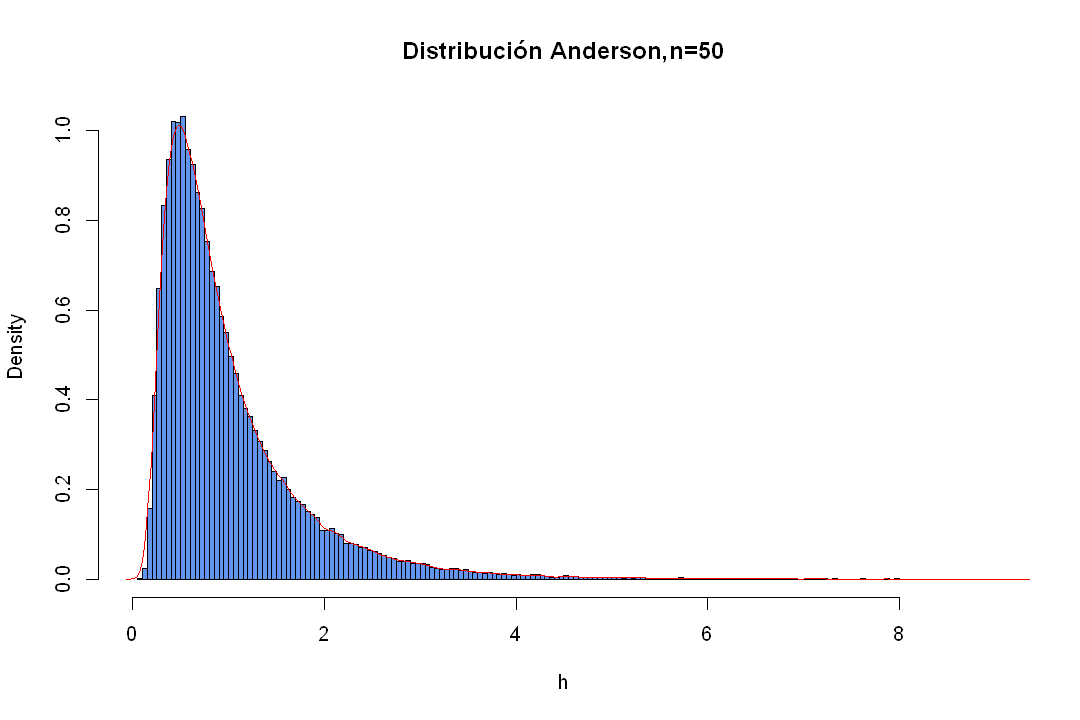

In [168]:
library(repr)
options(repr.plot.width=9, repr.plot.height=6)
hist(h,freq=FALSE, breaks=300, main="Distribución Anderson,n=50",
     col="cornflowerblue",xlim = c(0, 9.0))
lines(density(h),col="red")

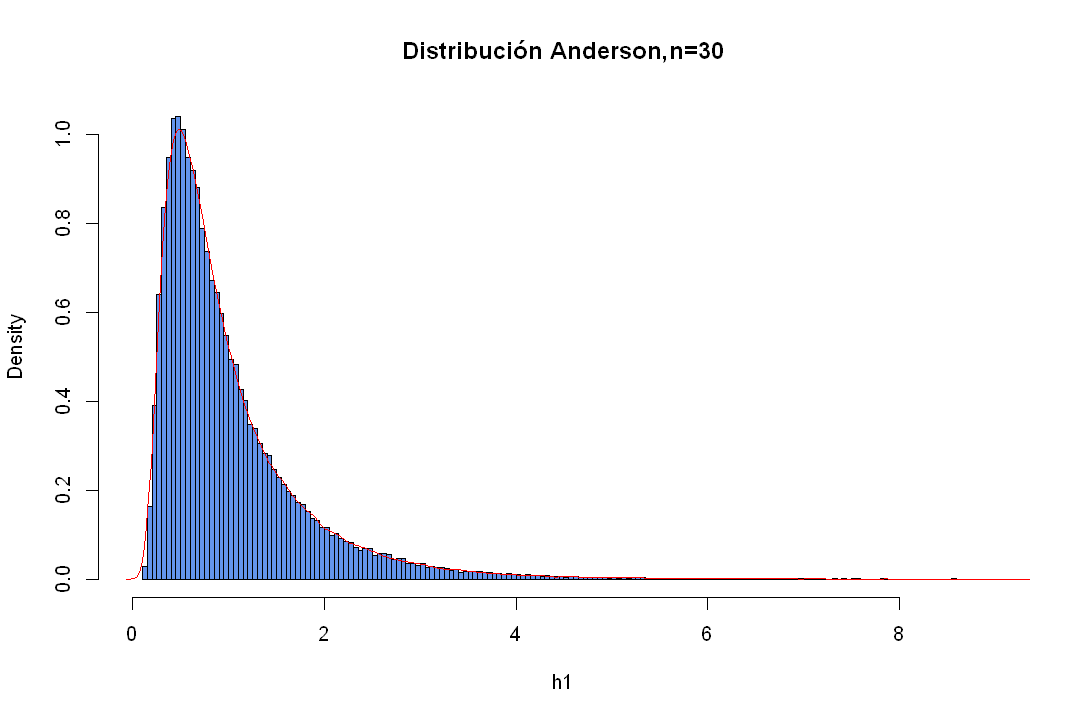

In [169]:
h1=ADTestNormal(100000,30,mu,s2)
options(repr.plot.width=9, repr.plot.height=6)
hist(h1,freq=FALSE, breaks=300, main="Distribución Anderson,n=30",
     col="cornflowerblue",xlim = c(0, 9.0))
lines(density(h),col="red")

In [170]:
print("Cuantiles de la distribución Anderson-Darling m=50")
print(round(quantile(h1,c(0.75,0.9,0.95,0.99)),3))
Q95<-round(quantile(h1,c(0.75,0.9,0.95,0.99)),3)[3]

[1] "Cuantiles de la distribución Anderson-Darling m=50"
  75%   90%   95%   99% 
1.252 1.941 2.509 3.877 


In [171]:
#funcion de discrepancia
disc<-function(m,mu,s2,data){
    sum=0
    norm<-sort(pnorm(data,mu,s2))    
    i=rev(c(1:m))     
    sum=(1/m)*sum((2*rev(i)-1)*(log(norm)+log(-norm[i]+1)))
    sum=-m-sum  
    return(sum)
}

In [172]:
data<-c( 1.662, 1.624, 1.508, 2.571, 2.032, 1.743, 1.475, 1.329, 1.951,
3.171, 0.350, 1.249, 3.483, 1.974, 2.165)
m1<-length(data)
print("La discrapancia es de:")
disc(m1,mu,s2,data)

[1] "La discrapancia es de:"


[1] 2.273465

Como el valor cae dentro de la región de aceptación para el cuantil de $0.95$ entonces podemos decir que no se rechaza la
hipotesis nula con un nivel de confianza de $0.95$

Ahora, supongan que no conocen los valores de $(\mu,\sigma)$, así que la hipótesis que pueden probar es
$$H_0 : \text{Los datos provienen de una población normal}$$
Aquí la idea es estimar los parametros de la distribución con la muestra generada, sabemos que un buen estimado de $\mu$ es $\bar{x}$ y para $\sigma^2$ es $s^2$

In [1]:
ADTestNormal1<-function(n,m){
    sum=0
    A=rep(0,n)
    for (j in 1:n){
    x=rnorm(m,0,1)
    mu<-mean(x)
    s2<-var(x)*(m/(m-1))
    z<-(x-mu)/sqrt(s2)
    norm<-pnorm(sort(z),0, 1)    
    i=rev(c(1:m))     
    sum=(1/m)*sum((2*rev(i)-1)*(log(norm)+log(-norm[i]+1)))
    sum=-m-sum 
    A[j]=sum            
}
    return(sort(A))
}

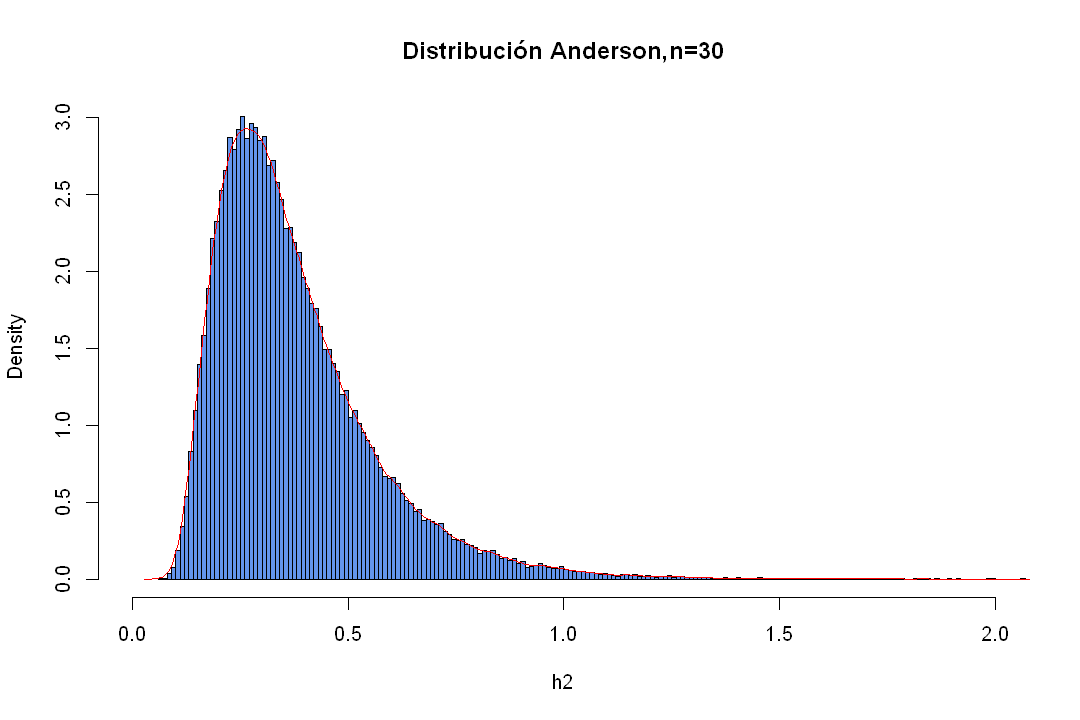

In [179]:
h2=ADTestNormal1(100000,50)
options(repr.plot.width=9, repr.plot.height=6)
hist(h2,freq=FALSE, breaks=300, main="Distribución Anderson,n=30",
     col="cornflowerblue",xlim = c(0, 2.0))
lines(density(h2),col="red")

In [181]:
print("Cuantiles de la distribución Anderson-Darling m=50")
print(round(quantile(h2,c(0.75,0.9,0.95,0.99)),3))

[1] "Cuantiles de la distribución Anderson-Darling m=50"
  75%   90%   95%   99% 
0.459 0.616 0.734 1.006 


In [182]:
data1<-c(6.466,7.528,6.55682,6.3396,6.38785,7.60078,5.72222,5)
m2<-length(data1)
s<-var(data1)
med<-mean(data1)
print("La discrapancia es de:")
disc(m2,med,s,data1)

[1] "La discrapancia es de:"


[1] 0.4389356

Por tanto no se rechaza $H_0$ con nivel de confianza de $0.75$.

Se generan muestras de una Cauchy y se transforman como si fueran normales. Usando el cuantil 0.95 que encontraron anteriormente, 
para decidir si rechazan la hipótesis se calcula la tasa de rechazo.

In [189]:
cau<-function(n,m,loc,sca){
    sum=0
    A=rep(0,n)
    for (j in 1:n){
    cau<-pnorm(sort(rcauchy(m,loc,sca)),mu, s2)    
    i=rev(c(1:m))     
    sum=(1/m)*sum((2*rev(i)-1)*(log(cau)+log(-cau[i]+1)))
    sum=-m-sum  
    A[j]=sum            
}
    return(sort(A))
}

In [190]:
A<-cau(n,30,2.34,1.27)
cont=(sum((A>=q95)*1)/n)*100
print("La tasa de rechazo es ")
print(cont)

[1] "La tasa de rechazo es "
[1] 98.688
